In [2]:
import os
os.listdir()


['.ipynb_checkpoints',
 'anaconda_projects',
 'app.py',
 'Fruit And Vegetable Diseases Dataset',
 'templates',
 'Untitled2.ipynb']

In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Correct dataset folder name
dataset_path = 'Fruit And Vegetable Diseases Dataset'

img_height, img_width = 224, 224
batch_size = 32

# Augmentation & Normalization
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation',
    shuffle=True
)


Found 23431 images belonging to 28 classes.
Found 5846 images belonging to 28 classes.


In [4]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Load base VGG16 model (without top layers)
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg.trainable = False  # Freeze the base model

# Build custom classifier on top
model = Sequential([
    vgg,
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(28, activation='softmax')  # 28 classes
])

# Compile the model
model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape              ┃        Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                │ (None, 7, 7, 512)         │     14,714,688 │
├───────────────────────────────────┼───────────────────────────┼────────────────┤
│ flatten (Flatten)                 │ (None, 25088)             │              0 │
├───────────────────────────────────┼───────────────────────────┼────────────────┤
│ dropout (Dropout)                 │ (None, 25088)             │              0 │
├───────────────────────────────────┼───────────────────────────┼────────────────┤
│ dense (Dense)                     │ (None, 128)               │      3,211,392 │
├───────────────────────────────────┼───────────────────────────┼────────────────┤
│ dropout_1 (Dropout)               │ (None, 128)               │              0 │
├───────────────────────────────────┼───────────────────────────┼────────────────┤
│ dense_1 (Dense)                   │ (None, 28)                │          3,612 │
└───────────────────────────────────┴───────────────────────────┴────────────────┘

 Total params: 17,929,692 (68.40 MB)

 Trainable params: 3,215,004 (12.26 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Add callbacks
checkpoint = ModelCheckpoint('healthy_vs_rotten.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Train model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[checkpoint, early_stop]
)


C:\Users\User\anaconda3\envs\smartsort\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
101/733 ━━━━━━━━━━━━━━━━━━━━ 1:17:57 7s/step - accuracy: 0.1963 - loss: 3.0672

C:\Users\User\anaconda3\envs\smartsort\lib\site-packages\PIL\Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


733/733 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.3788 - loss: 2.1430

733/733 ━━━━━━━━━━━━━━━━━━━━ 6026s 8s/step - accuracy: 0.3789 - loss: 2.1424 - val_accuracy: 0.6945 - val_loss: 1.0432
Epoch 2/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6032 - loss: 1.2207

733/733 ━━━━━━━━━━━━━━━━━━━━ 5320s 7s/step - accuracy: 0.6032 - loss: 1.2206 - val_accuracy: 0.7349 - val_loss: 0.8791
Epoch 3/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6501 - loss: 1.0705

733/733 ━━━━━━━━━━━━━━━━━━━━ 5295s 7s/step - accuracy: 0.6501 - loss: 1.0705 - val_accuracy: 0.7761 - val_loss: 0.7291
Epoch 4/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6662 - loss: 1.0199

733/733 ━━━━━━━━━━━━━━━━━━━━ 5346s 7s/step - accuracy: 0.6662 - loss: 1.0199 - val_accuracy: 0.7788 - val_loss: 0.7478
Epoch 5/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6866 - loss: 0.9579

733/733 ━━━━━━━━━━━━━━━━━━━━ 5354s 7s/step - accuracy: 0.6866 - loss: 0.9579 - val_accuracy: 0.7857 - val_loss: 0.6809
Epoch 6/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6901 - loss: 0.9386

733/733 ━━━━━━━━━━━━━━━━━━━━ 5167s 7s/step - accuracy: 0.6901 - loss: 0.9386 - val_accuracy: 0.7944 - val_loss: 0.6259
Epoch 7/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 5241s 7s/step - accuracy: 0.7003 - loss: 0.9166 - val_accuracy: 0.7905 - val_loss: 0.6585
Epoch 8/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7029 - loss: 0.8865

733/733 ━━━━━━━━━━━━━━━━━━━━ 5451s 7s/step - accuracy: 0.7029 - loss: 0.8865 - val_accuracy: 0.7978 - val_loss: 0.6300
Epoch 9/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7142 - loss: 0.8544

733/733 ━━━━━━━━━━━━━━━━━━━━ 5608s 8s/step - accuracy: 0.7142 - loss: 0.8544 - val_accuracy: 0.8158 - val_loss: 0.5750
Epoch 10/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7177 - loss: 0.8401

In [ ]:
import os
print("Model saved:", 'healthy_vs_rotten.h5' in os.listdir())


In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

# Load the model you already trained for 10 epochs
model = load_model('healthy_vs_rotten.h5')

# Unfreeze the last 4 layers of VGG16 base
for layer in model.layers[0].layers[-4:]:
    layer.trainable = True

# Recompile with a low learning rate
model.compile(
    optimizer=Adam(1e-5),  # small LR for fine-tuning
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 28)                  │           3,612 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,929,692 (68.40 MB)

 Trainable params: 10,294,428 (39.27 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint('healthy_vs_rotten_finetuned.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_loss', patience=2)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=3,
    callbacks=[checkpoint, early_stop]
)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = 'Fruit And Vegetable Diseases Dataset'
img_height, img_width = 224, 224
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation',
    shuffle=True
)


Found 23431 images belonging to 28 classes.
Found 5846 images belonging to 28 classes.


In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=3,
    callbacks=[checkpoint, early_stop]
)


C:\Users\User\anaconda3\envs\smartsort\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
 26/733 ━━━━━━━━━━━━━━━━━━━━ 1:47:43 9s/step - accuracy: 0.6766 - loss: 0.8954

C:\Users\User\anaconda3\envs\smartsort\lib\site-packages\PIL\Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


294/733 ━━━━━━━━━━━━━━━━━━━━ 1:05:44 9s/step - accuracy: 0.7235 - loss: 0.8127

In [2]:
import os
import random
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to dataset (adjust if different)
folder_path = "Fruit And Vegetable Diseases Dataset/Tomato___Rotten"

# Random image from the folder
random_img = random.choice(os.listdir(folder_path))
img_path = os.path.join(folder_path, random_img)

# Load and preprocess
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred = model.predict(img_array)[0]
predicted_class_index = np.argmax(pred)
confidence = pred[predicted_class_index] * 100
predicted_label = class_labels[predicted_class_index]

# Show image and result
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {predicted_label} ({confidence:.2f}%)")
plt.show()


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Fruit And Vegetable Diseases Dataset/Tomato___Rotten'

In [3]:
import os
os.listdir("Fruit And Vegetable Diseases Dataset")


['Apple__Healthy',
 'Apple__Rotten',
 'Banana__Healthy',
 'Banana__Rotten',
 'Bellpepper__Healthy',
 'Bellpepper__Rotten',
 'Carrot__Healthy',
 'Carrot__Rotten',
 'Cucumber__Healthy',
 'Cucumber__Rotten',
 'Grape__Healthy',
 'Grape__Rotten',
 'Guava__Healthy',
 'Guava__Rotten',
 'Jujube__Healthy',
 'Jujube__Rotten',
 'Mango__Healthy',
 'Mango__Rotten',
 'Orange__Healthy',
 'Orange__Rotten',
 'Pomegranate__Healthy',
 'Pomegranate__Rotten',
 'Potato__Healthy',
 'Potato__Rotten',
 'Strawberry__Healthy',
 'Strawberry__Rotten',
 'Tomato__Healthy',
 'Tomato__Rotten']

In [5]:
import os
import random
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# ✅ Use the correct folder name from your list
folder_path = "Fruit And Vegetable Diseases Dataset/Tomato__Rotten"

# Pick a random image from the folder
random_img = random.choice(os.listdir(folder_path))
img_path = os.path.join(folder_path, random_img)

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred = model.predict(img_array)[0]
predicted_class_index = np.argmax(pred)
confidence = pred[predicted_class_index] * 100
predicted_label = class_labels[predicted_class_index]

# Show image and prediction
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {predicted_label} ({confidence:.2f}%)")
plt.show()


NameError: name 'model' is not defined

In [6]:
from tensorflow.keras.models import load_model

model = load_model("healthy_vs_rotten.h5")  # or 'healthy_vs_rotten_finetuned.h5' if available


In [12]:
class_labels = sorted(os.listdir("Fruit And Vegetable Diseases Dataset"))


In [13]:
from tensorflow.keras.models import load_model
model = load_model("healthy_vs_rotten.h5")


In [16]:
import os

class_labels = sorted(os.listdir("Fruit And Vegetable Diseases Dataset"))
print(class_labels)


['Apple__Healthy', 'Apple__Rotten', 'Banana__Healthy', 'Banana__Rotten', 'Bellpepper__Healthy', 'Bellpepper__Rotten', 'Carrot__Healthy', 'Carrot__Rotten', 'Cucumber__Healthy', 'Cucumber__Rotten', 'Grape__Healthy', 'Grape__Rotten', 'Guava__Healthy', 'Guava__Rotten', 'Jujube__Healthy', 'Jujube__Rotten', 'Mango__Healthy', 'Mango__Rotten', 'Orange__Healthy', 'Orange__Rotten', 'Pomegranate__Healthy', 'Pomegranate__Rotten', 'Potato__Healthy', 'Potato__Rotten', 'Strawberry__Healthy', 'Strawberry__Rotten', 'Tomato__Healthy', 'Tomato__Rotten']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


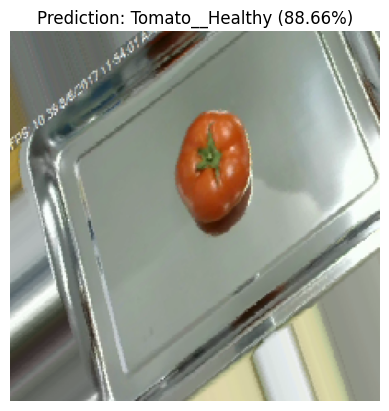

In [18]:
import random
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

folder_path = "Fruit And Vegetable Diseases Dataset/Tomato__Healthy"  # change to any class
random_img = random.choice(os.listdir(folder_path))
img_path = os.path.join(folder_path, random_img)

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)[0]
predicted_class_index = np.argmax(pred)
confidence = pred[predicted_class_index] * 100
predicted_label = class_labels[predicted_class_index]

plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {predicted_label} ({confidence:.2f}%)")
plt.show()
